### 1. Data Scraping

In [201]:
# Import Libraries
from bs4 import BeautifulSoup
import requests
import csv
import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 100)

In [2]:
# get the number of pages
main_url = 'https://www.bukitvista.com/property'
req = requests.get(main_url)
soup = BeautifulSoup(req.content, 'html.parser')
total_properties = soup.find('div', {'class':'listing-tabs flex-grow-1'}).text
total_properties = int(total_properties.split(' ')[0])

page = math.ceil(total_properties/10) #karena setiap page berisi 10 property

In [19]:
# Scraping data
data_save = []
for num_page in range(1, page+1):
    url = f'https://www.bukitvista.com/property/page/{num_page}'
    req = requests.get(url)
    soup = BeautifulSoup(req.content, 'html.parser')
    data = soup.find_all('div', {'class':'item-listing-wrap'})
    
    for properties in data:
        title = properties.find('h2', {'class': 'item-title'}).find('a').text
        
        property_url = properties.find('h2', {'class': 'item-title'}).find('a')['href']
        property_req = requests.get(property_url)
        property_soup = BeautifulSoup(property_req.content, 'html.parser')
        
        address_raw = property_soup.find('li', {'class':'detail-address'})
        if address_raw:
            address = address_raw.find('span').text.strip()
        else:
            address = 'not found'
        
        city_raw = property_soup.find('li', {'class':'detail-city'})
        if city_raw:
            city = city_raw.find('span').text.strip()
        else:
            city = 'not found'
            
        area_raw = property_soup.find('li', {'class':'detail-area'})
        if area_raw:
            area = area_raw.find('span').text.strip()
        else:
            area = 'not found'
            
        detail_raw = property_soup.find('ul', {'class':'list-1-cols list-unstyled'})
        if detail_raw:
            list_elment = detail_raw.find_all('li')
            for lis in list_elment:
                strong_raw = lis.find('strong')
                if strong_raw:
                    if 'Property ID' in strong_raw.text:
                        span_raw = lis.find('span')
                        if span_raw:
                            property_id = span_raw.text.strip()
                        else:
                            property_id = 'not found'
                    
                    if 'Price' in strong_raw.text:
                        span_raw = lis.find('span')
                        if span_raw:
                            price = span_raw.text.strip()
                        else:
                            price = 'not found'
                            
                    if 'Bedrooms' in strong_raw.text:
                        span_raw = lis.find('span')
                        if span_raw:
                            bedrooms = span_raw.text.strip()
                        else:
                            bedrooms = 'not found'
                    
                    if 'Bathrooms' in strong_raw.text:
                        span_raw = lis.find('span')
                        if span_raw:
                            bathrooms = span_raw.text.strip()
                        else:
                            bathrooms = 'not found'
                    
                    if 'Property Type' in strong_raw.text:
                        span_raw = lis.find('span')
                        if span_raw:
                            property_type = span_raw.text.strip()
                        else:
                            property_type = 'not found'
                            
        data_save.append([title, address, city, area, property_id, price, bedrooms, bathrooms, property_type])

In [21]:
# saving to csv
columns = ['title', 'address', 'city', 'area', 'property_id', 'price', 'bedrooms', 'bathrooms', 'property_type']
with open('E:\DATA\BOOTCAMP DIBIMBING\Bootcamp\InternPro\\data_scrapping.csv', 'w', encoding='utf8') as f:
     
    # using csv.writer method from CSV package
    write = csv.writer(f)
     
    write.writerow(columns)
    write.writerows(data_save)

### 2. Load Dataset

In [230]:
# Load dataset & view
df = pd.read_csv('data_scrapping.csv')
df.head()

,title,address,city,area,property_id,price,bedrooms,bathrooms,property_type
0,Retreat to Nature Jungle House Villa near Canggu,"Tabanan, Bali",Bali,Canggu,PR0774,Start from $144 USD per night,2,2.0,"Jungle View, Residential, Villa"
1,Luxurious Private Villa with Pool in Idyllic P...,"Gg. Meregan &, Jl. Toya Ning II, Ungasan, Sout...",Bali,Ungasan,PR0774,"Start from $2,346 USD per Month",2,2.0,Villa
2,Villa by Rice Fields in Canggu,"Pura Wates Canggu No.39, Canggu, Kec. Kuta Uta...",Bali,Canggu,PR0776,"Start from $2,200 USD per Month",2,2.0,"Rice paddy view, Villa"
3,Villa in Tumbak Bayuh,not found,not found,not found,PR0776,"Start from $2,200 USD per Month",2,2.0,"Rice paddy view, Villa"
4,Secluded 2BR Villa w/ Pool @ Complex in Nusa Dua,"Nusa Dua, Kuta Selatan, Badung, Bali",Bali,Nusa Dua,PR0715,"Start from $2,160 USD per Month",2,2.0,View


In [231]:
# general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          95 non-null     object 
 1   address        95 non-null     object 
 2   city           95 non-null     object 
 3   area           95 non-null     object 
 4   property_id    95 non-null     object 
 5   price          95 non-null     object 
 6   bedrooms       95 non-null     int64  
 7   bathrooms      95 non-null     float64
 8   property_type  95 non-null     object 
dtypes: float64(1), int64(1), object(7)
memory usage: 6.8+ KB


In [232]:
# data frame columns
df.columns

Index(['title', 'address', 'city', 'area', 'property_id', 'price', 'bedrooms',
       'bathrooms', 'property_type'],
      dtype='object')

In [233]:
# retrieve some columns
df = df[['property_id', 'title', 'city', 'area', 'price', 'bedrooms','bathrooms', 'property_type']]

Observation:

- beberapa kolom terdapat value `not found` karena informasi tidak terdapat pada halaman website
- Data property berisi 95 baris dan 9 kolom
- tidak terdapat missing value, tetapi terdapat value yg tidak tersedia(`not found`)

### 3. Data Cleaning

In [234]:
# duplicated rows check
duplicate_rows_data = df.duplicated().sum()
print(f"number of duplicate rows: {duplicate_rows_data}")

number of duplicate rows: 0


In [235]:
# drop `not found` values
df = df[~(df.isin(['not found']).any(axis=1))]

In [236]:
# reset index
df.reset_index(inplace=True)
df.head(3)

,index,property_id,title,city,area,price,bedrooms,bathrooms,property_type
0,0,PR0774,Retreat to Nature Jungle House Villa near Canggu,Bali,Canggu,Start from $144 USD per night,2,2.0,"Jungle View, Residential, Villa"
1,1,PR0774,Luxurious Private Villa with Pool in Idyllic P...,Bali,Ungasan,"Start from $2,346 USD per Month",2,2.0,Villa
2,2,PR0776,Villa by Rice Fields in Canggu,Bali,Canggu,"Start from $2,200 USD per Month",2,2.0,"Rice paddy view, Villa"


Note:

- Value `not found` sudah dihilangkan dari data
- Tidak ada nilai duplicate di data 

### 4. Data Preprocessing

In [237]:
# general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          77 non-null     int64  
 1   property_id    77 non-null     object 
 2   title          77 non-null     object 
 3   city           77 non-null     object 
 4   area           77 non-null     object 
 5   price          77 non-null     object 
 6   bedrooms       77 non-null     int64  
 7   bathrooms      77 non-null     float64
 8   property_type  77 non-null     object 
dtypes: float64(1), int64(2), object(6)
memory usage: 5.5+ KB


Observation:

- Beberapa kolom mempunyai tipe data yang aneh
- Kolom price akan dibuat numeric
- Kolom bedrooms & bathrooms akan dibuat integer

#### 4.1 Pre-processing bathrooms columns

In [238]:
# check unique value
df['bathrooms'].unique()

array([2. , 2.5, 3. , 4. , 5. ])

- Terdapat jumalah bathrooms 2.5, angka ini janggal dan akan dibulatkan keatas
- Kemungkinan 0.5 disini berarti little bathrooms

In [239]:
# round up & convert type of bathrooms column
df['bathrooms'] = df['bathrooms'].apply(np.ceil)
df['bathrooms'] = df['bathrooms'].astype(int)

In [240]:
# re-check unique value
df['bathrooms'].unique()

array([2, 3, 4, 5])

#### 4.2 Pre-processing price columns

In [241]:
# make price data frame
df_price_raw = df['price'].str.split(' ', expand=True)
df_price_raw

,0,1,2,3,4,5,6,7
0,Start,from,$144,USD,per,night,None,None
1,Start,from,"$2,346",USD,per,Month,None,None
2,Start,from,"$2,200",USD,per,Month,None,None
3,Start,from,"$2,160",USD,per,Month,None,None
4,Start,from,"$2,400",USD,per,Month,None,None
5,Start,from,"$2,050",USD,per,Month,None,None
6,Start,from,"$3,200",USD,per,Month,None,None
7,Start,from,$151,USD,for,15,year,lease
8,Mulai,dari,Rp1.201.000,Rupiah,per,Malam,None,None
9,Mulai,dari,Rp1.020.000,Rupiah,per,Malam,None,None


Note:

- kolom 2 akan diambil untuk menentukan harga
- ada dua satuan mata uang yaitu dollar dan rupiah dalam penulisan harga di bukit vista
- terdapat beberapa format aneh di beberapa baris sehingga akan kita lakukan preprocessing agar didapat format yang rapi dan sesuai

In [242]:
# change some odd symbol
df_price_raw[2] = df_price_raw[2].str.replace(',', '')
df_price_raw[2] = df_price_raw[2].str.replace('.', '')
df_price_raw[2] = df_price_raw[2].str.replace('$', 'dollar ')
df_price_raw[2] = df_price_raw[2].str.replace('Rp', 'rupiah ')
df_price_raw[2] = df_price_raw[2].str.replace('USD', 'dollar 41')
df_price_raw[2] = df_price_raw[2].str.replace('R', 'rupiah ')
df_price_raw[2] = df_price_raw[2].str.replace('16335', 'dollar 16335')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4508\3912763754.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_price_raw[2] = df_price_raw[2].str.replace('.', '')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4508\3912763754.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_price_raw[2] = df_price_raw[2].str.replace('$', 'dollar ')


In [243]:
df_price_raw.head(2)

,0,1,2,3,4,5,6,7
0,Start,from,dollar 144,USD,per,night,None,None
1,Start,from,dollar 2346,USD,per,Month,None,None


In [244]:
# retrieve booking duration column
df_price_raw[5] = df_price_raw[5].str.lower()

In [245]:
# unique values
df_price_raw[5].unique()

array(['night', 'month', '15', 'malam', 'year', None], dtype=object)

In [246]:
# encode
df_price_raw[5] = df_price_raw[5].str.replace('night', '1')
df_price_raw[5] = df_price_raw[5].str.replace('malam', '1')
df_price_raw[5] = df_price_raw[5].str.replace('month', '30')
df_price_raw[5] = df_price_raw[5].str.replace('year', '365')

In [247]:
# check none values
df_price_raw[~(df_price_raw[5].str.isdigit() == True)]

,0,1,2,3,4,5,6,7
18,Start,from,dollar 13,per,night,None,None,None
19,Start,from,dollar 24,per,night,None,None,None
22,Start,from,dollar 23,per,night,None,None,None
24,Start,from,dollar 18,per,night,None,None,None
45,Start,from,dollar 100,USD,None,None,None,None
48,Start,from,dollar 40,USD,None,None,None,None
72,Start,from,dollar 1380,per,Month,None,None,None


In [248]:
# encode none value
df_price_raw.iloc[72,5] = '30'

In [249]:
# encode none value
df_price_raw[5].fillna('1', inplace=True)

In [250]:
# encode none value
df_price_raw[5] = df_price_raw[5].str.replace('15', '5475')

In [251]:
# make new price data frame
df_price = df_price_raw[[2,5]]
df_price

,2,5
0,dollar 144,1
1,dollar 2346,30
2,dollar 2200,30
3,dollar 2160,30
4,dollar 2400,30
5,dollar 2050,30
6,dollar 3200,30
7,dollar 151,5475
8,rupiah 1201000,1
9,rupiah 1020000,1


In [252]:
# split columns
df_price[['currency', 'price']] = df_price[2].str.split(' ',expand=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4508\3035828507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price[['currency', 'price']] = df_price[2].str.split(' ',expand=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4508\3035828507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price[['currency', 'price']] = df_price[2].str.split(' ',expand=True)


In [253]:
# drop column
df_price.drop(columns=2, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4508\3855051194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price.drop(columns=2, inplace=True)


In [254]:
# rename column
df_price.rename(columns={5: 'day'}, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4508\274407227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price.rename(columns={5: 'day'}, inplace=True)


In [255]:
df_price = df_price[['price', 'day', 'currency']]

In [256]:
# encode column currency
df_price['currency'] = df_price['currency'].str.replace('rupiah', '1')
df_price['currency'] = df_price['currency'].str.replace('dollar', '15322')

In [257]:
# general information
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   price     77 non-null     object
 1   day       77 non-null     object
 2   currency  77 non-null     object
dtypes: object(3)
memory usage: 1.9+ KB


In [258]:
# convert column type
df_price['price'] = df_price['price'].astype(int)
df_price['day'] = df_price['day'].astype(int)
df_price['currency'] = df_price['currency'].astype(int)

In [259]:
df_price.head()

,price,day,currency
0,144,1,15322
1,2346,30,15322
2,2200,30,15322
3,2160,30,15322
4,2400,30,15322


In [260]:
# final price data frame
df_price['fnal_price'] = df_price['price']/df_price['day']*df_price['currency']
df_price

,price,day,currency,fnal_price
0,144,1,15322,2.206368e+06
1,2346,30,15322,1.198180e+06
2,2200,30,15322,1.123613e+06
3,2160,30,15322,1.103184e+06
4,2400,30,15322,1.225760e+06
5,2050,30,15322,1.047003e+06
6,3200,30,15322,1.634347e+06
7,151,5475,15322,4.225794e+02
8,1201000,1,1,1.201000e+06
9,1020000,1,1,1.020000e+06


In [261]:
# drop price column
df.drop(columns='price', inplace=True)

In [264]:
# assign new columns
df['price'] = df_price['fnal_price']
df['booking_duration'] = df_price['day']
df.drop('index', axis=1, inplace=True)
df.head(3)

,property_id,title,city,area,bedrooms,bathrooms,property_type,price,booking_duration
0,PR0774,Retreat to Nature Jungle House Villa near Canggu,Bali,Canggu,2,2,"Jungle View, Residential, Villa",2.206368e+06,1
1,PR0774,Luxurious Private Villa with Pool in Idyllic P...,Bali,Ungasan,2,2,Villa,1.198180e+06,30
2,PR0776,Villa by Rice Fields in Canggu,Bali,Canggu,2,2,"Rice paddy view, Villa",1.123613e+06,30


Note:

- Data Frame ini sudah siap untuk digunakan dalam Exploratory data analysis dan Machine learning
- Dua kolom baru price dan booking duration menjadi feature yang sangat berguna dalam analisa maupun machine learning
- beberapa kolom bisa dilakukan encoding jika untuk keperluan machine learning

### 5. Exploratory Data Analysis

In [265]:
# general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   property_id       77 non-null     object 
 1   title             77 non-null     object 
 2   city              77 non-null     object 
 3   area              77 non-null     object 
 4   bedrooms          77 non-null     int64  
 5   bathrooms         77 non-null     int32  
 6   property_type     77 non-null     object 
 7   price             77 non-null     float64
 8   booking_duration  77 non-null     int32  
dtypes: float64(1), int32(2), int64(1), object(5)
memory usage: 4.9+ KB


Observation:

- setelah melakukan cleaning dan preprocessing semua data sesuai denan tipenya
- terdapat 77 baris dan 9 columns

In [266]:
# divide the column names based on their types
numericals = df.select_dtypes(include=['int64','float64', 'int32']).columns.tolist()
categoricals = df.select_dtypes(exclude=['int64','float64', 'int32']).columns.tolist()

print(f"numericals columns are {numericals}")
print(f"categoricals columns are {categoricals}")

numericals columns are ['bedrooms', 'bathrooms', 'price', 'booking_duration']
categoricals columns are ['property_id', 'title', 'city', 'area', 'property_type']


In [267]:
# numerical variable stats summary
df[numericals].describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,77.0,3.207792e+00,1.127849e+00,2.000000,2.000000,3.000000,4.0,6.000000e+00
bathrooms,77.0,2.870130e+00,9.914191e-01,2.000000,2.000000,3.000000,3.0,5.000000e+00
price,77.0,1.156797e+06,1.027124e+06,422.579361,454552.666667,806958.666667,1532200.0,6.721251e+06
booking_duration,77.0,9.451948e+01,6.226352e+02,1.000000,1.000000,30.000000,30.0,5.475000e+03


In [268]:
df['booking_duration'].value_counts()

30      47
1       28
5475     1
365      1
Name: booking_duration, dtype: int64

Observation:

- Nilai minimum dan maximum semua kolom masuk akal
- kolom bedrooms dan bathrooms terlihat simetris (mean ~ median)
- durasi booking terbanyak adalah bulanan dan ada 2 property yang tipe bokingnya tidak wajar per tahun dan per lima belas tahun
- secara rata-rata harga sewa properti di antara 800.000

In [269]:
# categorical variables stats summary
df[categoricals].describe().T

,count,unique,top,freq
property_id,77,68,PR0755,3
title,77,74,Rare Luxurious Artistic Home w/ Private Pool,2
city,77,3,Bali,47
area,77,10,Yogyakarta,20
property_type,77,25,Villa,17


Observation:

- ternyata ada beberapa property yang sama namun disewakan berbeda
- property tersebar di tiga kota Bali, Yogyakarta, dan Nusa Penida
- dari ketiga kota dibagi menjadi 10 area
- type property terbanyak adalah villa dan guest house, beberapa property mempuyai lebih dari satu type

In [270]:
# frequency details for each column
categoricals = ['city', 'area', 'property_type']
for col in categoricals:
  print(f"Value counts for column {col}:")
  print(df[col].value_counts())
  print("---"*10)
  print("\n")

Value counts for column city:
Bali           47
Yogyakarta     20
Nusa Penida    10
Name: city, dtype: int64
------------------------------


Value counts for column area:
Yogyakarta     20
Canggu         12
Nusa Penida    10
Uluwatu         9
Ungasan         7
Ubud            6
Bingin          6
Jimbaran        3
Nusa Dua        2
badung          2
Name: area, dtype: int64
------------------------------


Value counts for column property_type:
Villa                                        17
Guest House                                  15
Residential, Villa                            8
Guest House, Residential                      7
Rice paddy view, Villa                        4
Jungle View, Villa                            3
View, Villa                                   3
Beachfront, Guest House, Residential          2
Residential, Style, Villa                     2
Guest House, Residential, Style               1
Beachfront, Guest House, Ocean view           1
Beachfront, Guest House

In [271]:
# area per city
are_per_city = (df
                .groupby(['city', 'area'])
                .agg(total_property=('property_id','count'))
                .reset_index()
                .sort_values('city')
               )
are_per_city

,city,area,total_property
0,Bali,Bingin,6
1,Bali,Canggu,12
2,Bali,Jimbaran,3
3,Bali,Nusa Dua,2
4,Bali,Ubud,6
5,Bali,Uluwatu,9
6,Bali,Ungasan,7
7,Bali,badung,2
8,Nusa Penida,Nusa Penida,10
9,Yogyakarta,Yogyakarta,20


Observation

- Meskipun jumlah properti paling banyak di area jogja, namun jika dilihat area yang ada di kota Bali lebih bervariasi
- Hal ini wajar karena bukit vista bertumbuh dari property yang ada di kota bali terlebih dahulu

###### Check duplicate

In [272]:
df_copy = df.copy()

In [273]:
list_property_id = (df_copy[df_copy.duplicated(subset='property_id')]['property_id'])

In [274]:
filt = df_copy['property_id'].isin(list_property_id)
df_copy[filt].sort_values('property_id')

,property_id,title,city,area,bedrooms,bathrooms,property_type,price,booking_duration
72,PR0198,Enchanting Hillside Cabin w/ Pool @ Uluwatu Te...,Bali,Uluwatu,5,5,"Guest House, Island life",7.048120e+05,30
71,PR0198,Blissful Holiday Room in the Heart of Canggu,Bali,Canggu,5,5,"Guest House, Residential",3.524060e+05,30
51,PR0370,Rare Luxurious Artistic Home w/ Private Pool,Yogyakarta,Yogyakarta,4,3,"Residential, Villa",2.512808e+06,30
23,PR0370,Rare Luxurious Artistic Home w/ Private Pool,Yogyakarta,Yogyakarta,4,3,Villa,3.270000e+06,1
32,PR0387,Vintage Jogja Villa with Waterfall View!,Yogyakarta,Yogyakarta,2,2,"View, Villa",1.231000e+06,1
53,PR0387,Vintage Jogja Villa with Waterfall View!,Yogyakarta,Yogyakarta,2,2,"View, Villa",9.091053e+05,30
38,PR0475,Laid-back in Uluwatu Bungalow w/ Pool & Fast Wifi,Bali,Uluwatu,2,2,Guest House,4.034793e+05,30
39,PR0475,Ubud Summer House on the Edge of the Wilderness,Bali,Ubud,3,3,"Jungle View, Villa",1.011252e+06,30
5,PR0678,Dainty Villa w/ Restful Pool for Group at Ungasan,Bali,Ungasan,3,3,Villa,1.047003e+06,30
47,PR0678,Dainty Villa w/ Restful Pool for Group at Ungasan,Bali,Ungasan,3,3,"Residential, Villa",1.006145e+06,30


Observation:

- Beberapa property yang mempunyai property_id sama juga mempunyai title yang sama
- ada sedikit perbedaan pada harga, type property, dan durasi boking
- ini dianggap wajar jika satu property mempunyai durasi boking & type berbeda sehingga terdapat perbedaan harga

Saran:

**akan lebih baik dan memudahkan tim data apabila setiap property mempunyai unique property id jika terdapat perbedaan durasi boking saja** 

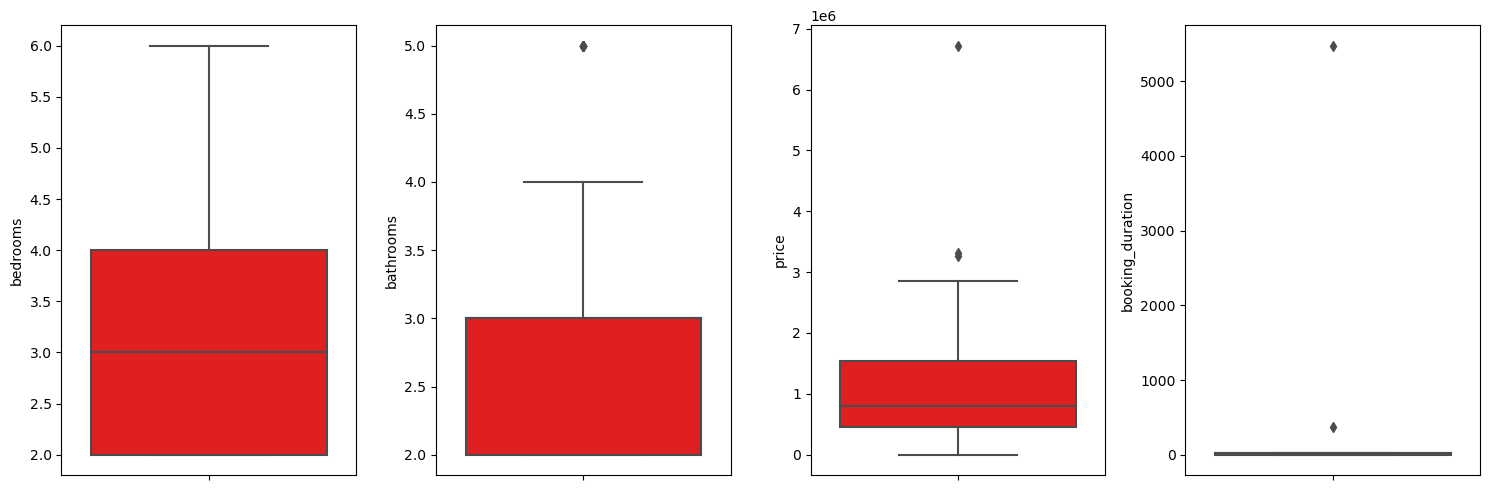

In [275]:
# adjust the figure size for better readability
plt.figure(figsize=(15,5))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='red')
    plt.tight_layout()

Observation:

- Boking duration mempunyai pencilan yang cukup ekstrem karena terdapat boking duration 15 tahun dan 1 tahun, untuk keperluan machine learning ini perlu dipertimbagkan untuk di drop
- kolom price juga mempunyai pencilan di harga +/- 6.700.000
- property termahal ada di kota bali area nusa dua dengan boking durasi per bulan

In [276]:
df[df['price'] == df['price'].max()]

,property_id,title,city,area,bedrooms,bathrooms,property_type,price,booking_duration
43,PR0242,Stunning Ocean View Nusa Dua Villa + Infinity ...,Bali,Nusa Dua,3,4,"Ocean view, Residential, Villa",6.721251e+06,30


#### Deep-dive analysis

**1. Secara rata-rata kota mana yang mempunyai harga properti paling tinggi**

In [277]:
# price per city
price_per_city = (df
                .groupby('city')
                .agg(mean_price=('price','mean'))
                .reset_index()
                .sort_values('mean_price', ascending=False)
               )
price_per_city

,city,mean_price
2,Yogyakarta,1.655121e+06
0,Bali,1.103178e+06
1,Nusa Penida,4.121618e+05


Note:

- secara rata Yogjakarta mempunyai harga sewa paling mahal.


2. **Apakah jika berdasarkan area, area di Yogyakarta mempunyai rata-rata harga paling tinggi?**

In [278]:
# price per city
price_per_area = (df
                .groupby(['city','area'])
                .agg(mean_price=('price','mean'),
                    total_property=('property_id', 'count'))
                .reset_index()
                .sort_values('mean_price', ascending=False)
               )
price_per_area

,city,area,mean_price,total_property
3,Bali,Nusa Dua,3.912217e+06,2
9,Yogyakarta,Yogyakarta,1.655121e+06,20
2,Bali,Jimbaran,1.310882e+06,3
6,Bali,Ungasan,1.193555e+06,7
7,Bali,badung,1.146596e+06,2
0,Bali,Bingin,1.006145e+06,6
5,Bali,Uluwatu,9.079704e+05,9
1,Bali,Canggu,8.567552e+05,12
4,Bali,Ubud,8.257560e+05,6
8,Nusa Penida,Nusa Penida,4.121618e+05,10


Observation:

- Jika berdasarkan area, Nusa Dua dari kota bali mempunyai harga rataan tertinggi hal tersebut kemugkinan disebabkan dari 2 properti yang ada di Nusa Dua merupakan property berkualitas tinngi
- Nusa Penida dan bali hanya mempunyai satu area
- Nusa Penida mempunyai harga paling murah dibanding area lain

Saran:

**Menurut saya akan lebih menarik dan informatif jika area Yogyakarta dan Nusa Penida lebih dispesifikasi seperti Bali** 

**3. Bagaimana hubungan antar kolom?**

In [279]:
# encoding property type
df['tag_property_type'] = df['property_type'].str.count(',')+1

<AxesSubplot:>

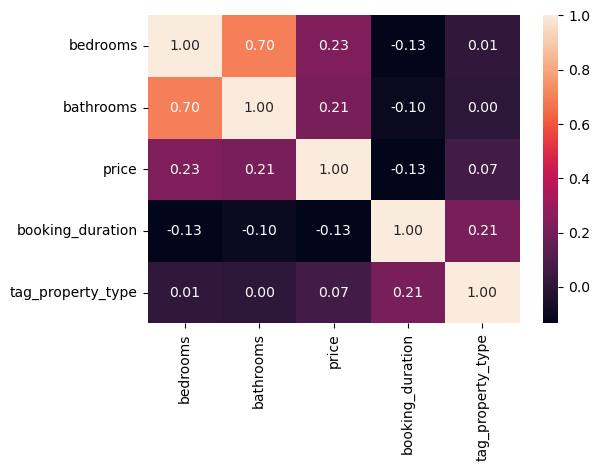

In [280]:
df.corr()# heatmap correlation
plt.figure(figsize=(6,4))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Observation:

- kolom bathrooms dan bedrooms mempunyai hubungan yang positif dan kuat yang berarti semakin banyak jumlah bedrooms suatu property maka semakin banyak pula jumlah bathroomsnya
- kolom yang berhubungan paling kuat dengan price adalah bedrooms dan hubungannya positif, semakin banyak bedroms maka harganya akan semakin tinggi
- hubungan booking duration dan price adalah negatif, hal tersebut berarti bahwa harga sewa property akan semakin rendah jika booking durasinya semakin lama

Saran:

**Property type akan lebih mudah ditafsirkan dan dianalisa jiga hanya satu per property**

**4. apakah booking duration benar-benar mempengaruhi harga?**

In [290]:
# price per duration
price_per_duration = (df
                      .groupby(['booking_duration'])
                      .agg(mean_price=('price','mean'))
                      .reset_index()
                      .sort_values('mean_price', ascending=False)
                     )
price_per_duration.head(2)

,booking_duration,mean_price
0,1,1.264676e+06
1,30,1.127156e+06


secara rata-rata booking duration per month lebih murah dibandingkan per hari, apakah ini berbeda secara statistik?

Dalam hal ini karena jumlah datanya terbatas saya akan mencoba menggunakan booking duration per hari dan per bulan saja


Saya akan melakukan Hypothesis testing dengan methode T-test, dengan alfa 0.05

> H0: secara rata-rata harga booking duration 1 hari dan 30 hari sama (**tidak berpengaruh**)  

> H1: secara rata-rata harga booking duration 1 hari dan 30 hari berbeda (**berpengaruh**)

In [287]:
# price month & day
price_day = df[df['booking_duration']==1]['price']
price_month = df[df['booking_duration']==30]['price']

In [288]:
# t-test
from statsmodels.stats.weightstats import ttest_ind

t_stat, p_val, _ = ttest_ind(price_month, 
                              price_day)
print(f"t_stat is {t_stat:.4f}")
print(f"p_val is {p_val:.6f}")

t_stat is -0.5564
p_val is 0.579648


Note:

p-value: 0.579 > 0.05 artinya H1 ditolak, **H0 diterima**

* secara statistik ternyata booking duration tidak mempengaruhi harga sewa

Saran:

**Kita dapat membuat Promo dengan tagline 'Booking Harian, Juga CUAN' karena sebenarnya booking bulanan dan harian tidak berbeda**

**5. Tadi disebutkan bahwa kota akan mempengaruhi harga setiap property, apakah itu benar secara statistik?**

Saya akan melakukan hypothesis testing dengan metode ANOVA dengan alfa 0.05

> H0: rata-rata harga setiap kota sama
> H0: rata-rata harga setiap kota berbeda


In [291]:
import pingouin as pg

In [293]:
df_anova = df[['city','price']]

In [294]:
# step 1: one-way ANOVA
anova_res = df_anova.anova(dv='price', between='city', detailed=True)
anova_res.loc[:,['Source','SS','DF','MS','F','p-unc']]

,Source,SS,DF,MS,F,p-unc
0,city,1.064648e+13,2,5.323242e+12,5.665274,0.005137
1,Within,6.953236e+13,74,9.396264e+11,NaN,NaN


Note:

p-value: 0.051 > 0.05 artinya H1 ditolak, **H0 diterima**

* ternyata secara statistik harga sewa property bukit vista di tiga kota sama

### 6. Saving Final Dataset

In [305]:
# saving to local
df.to_csv('E:\DATA\BOOTCAMP DIBIMBING\Bootcamp\InternPro\Final_Dataset.csv', index=False)

Rangkuman saran:

1. Akan lebih baik dan memudahkan tim data apabila setiap property mempunyai unique property id jika terdapat perbedaan durasi boking saja
2. Menurut saya akan lebih menarik dan informatif jika area Yogyakarta dan Nusa Penida lebih dispesifikasi seperti Bali
3. Property type akan lebih mudah ditafsirkan dan dianalisa jiga hanya satu per property
4. Kita dapat membuat Promo dengan tagline 'Booking Harian, Juga CUAN' karena sebenarnya booking bulanan dan harian tidak berbeda
5. Menambahkan fitur bintang(kualitas) pada setiap property akan memudahkan customer dalam memilih